In [2]:
import numpy as np
import pandas as pd

def benchmark(x1, x2):
    return (    (1.3356 * (1.5 * (1 - x1))) 
                + (np.exp((2 * x1) - 1) * np.sin((3 * np.pi) * ((x1 - 0.6) ** 2)))
                + (np.exp(3 * (x2 - 0.5)) * np.sin((4 * np.pi) * ((x2 - 0.9) ** 2)))
            )

def getData(grid):
    x1 = np.linspace(0, 1, grid)
    x2 = np.linspace(0, 1, grid)
    x1, x2 = np.meshgrid(x1, x2)
    f_x1_x2 = benchmark(x1, x2)
    data = {'x1': x1.flatten(), 'x2': x2.flatten(), 'f(x1,x2)': f_x1_x2.flatten()}
    df = pd.DataFrame(data)
    return df


df_1000 = getData(32)
df_test = pd.read_excel("./Kriging-data.xlsx", sheet_name="Test")
df_training = pd.read_excel("./Kriging-data.xlsx", sheet_name="Training")

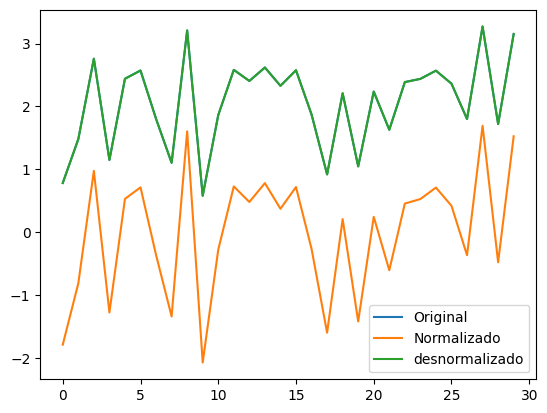

In [12]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
out_scaler = StandardScaler()

def show_norm(df, label="data", plot=False):
    df_norm = pd.DataFrame(scaler.transform(df), columns=df.columns)
    df_denorm = pd.DataFrame(scaler.inverse_transform(df_norm), columns=df_norm.columns)

    if (plot):
        df.plot(title=f"{label}: Original data")
        df_norm.plot(title=f"{label}: Normalized data")
        df_denorm.plot(title=f"{label}: Denormalized data")
    return (df_norm)


def test_out_scaler(df):
    out = df["f(x1,x2)"].values.reshape(-1, 1)  
    plt.plot(out, label='Original')
    out_scaler.fit(out)
    norm = out_scaler.transform(out)
    plt.plot(norm, label='Normalizado')
    plt.plot(out_scaler.inverse_transform(norm), label='desnormalizado')
    plt.legend()
    plt.show()

scaler.fit(df_training)
test_out_scaler(df_training)

In [3]:
import pandas as pd
variograms =  ["Exponential", "Gaussian", "HoleEffect", "Linear", "Original", "Power", "Spherical"]

def SumarizeForNewData():
    df = {"metric": ["r2", "mse", "mape", "rmse"]}
    for variogram in variograms:
        path = f"./{variogram}/results/results.xlsx"
        data = pd.read_excel(path, sheet_name="metrics")
        df[variogram] = data["media"]
    return pd.DataFrame(df)

def SumarizeTrainingMean():
    df = {}
    for variogram in variograms:
        path = f"./{variogram}/results/better_results.xlsx"
        data = pd.read_excel(path)
        data = data.drop(data.columns[-1], axis=1)
        mean_values = data.iloc[:, 2:].mean()
        df[variogram] = mean_values       
    return pd.DataFrame(df)

def SumarizeTraining(sort_by):
    df_dict = {}

    for variogram in variograms:
        path = f"./{variogram}/results/better_results.xlsx"
        data = pd.read_excel(path, index_col=None)
        
        data = data.sort_values(by=sort_by)
        df_dict[variogram] = data.iloc[0]
    
    df = pd.DataFrame(df_dict)
    df = (df.iloc[1:]).T
    return df


In [4]:
print ("++++++++++++++++++++++++++++ Métricas para o conjunto novo de 20 dados +++++++++++++++++++++++ ")
display(SumarizeForNewData())

print ("++++++++++++++++++++++++++++ Média das métricas de treinamento +++++++++++++++++++++++ ")
display(SumarizeTrainingMean())

print ("++++++++++++++++++++++++++++ Métricas de treinamento para o melhor modelo +++++++++++++++++++++++ ")
df = SumarizeTraining(sort_by="mse")
display(df)

++++++++++++++++++++++++++++ Métricas para o conjunto novo de 20 dados +++++++++++++++++++++++ 


metric  Exponential  Gaussian  HoleEffect    Linear  Original     Power  \
0     r2     0.720283  0.758936    0.481468  0.447139  0.268235  0.329527   
1    mse     0.195948  0.168870    0.363242  0.387291  0.512616  0.469680   
2   mape     0.383924  0.303204    0.476856  0.597657  0.750224  0.686811   
3   rmse     0.442660  0.410939    0.602696  0.622327  0.715972  0.685332   

   Spherical  
0   0.670067  
1   0.231125  
2   0.382073  
3   0.480754

++++++++++++++++++++++++++++ Média das métricas de treinamento +++++++++++++++++++++++ 


Exponential    Gaussian  HoleEffect      Linear    Original  \
r2           0.945405    0.952464    0.848132    0.114644    0.657970   
r2_sup       0.611336    0.641516    0.434312   -1.425601    0.021993   
r2_test      0.926871    0.929737    0.740591    0.136690    0.142695   
r2_val       0.929764    0.946435    0.830375   -0.425299   -1.106852   
r2_vt        0.931690    0.943995    0.797745   -0.082782    0.163402   
mse          0.017881    0.019973    0.051703    0.107789    0.174892   
mse_sup      0.230727    0.212812    0.335817    1.439941    0.580587   
mse_test     0.019293    0.021281    0.087206    0.129044    0.245585   
mse_val      0.020188    0.016206    0.057870    0.164771    0.268389   
mse_vt       0.019741    0.018743    0.072538    0.146907    0.255720   
mape         0.047336    0.042170    0.087922    0.114828    0.213124   
rmse         0.103639    0.090632    0.226555    0.324143    0.417009   
r2_adj       0.902510    0.915115    0.728808   -0.580994    1.381495   
rsd          0.104472    0.091360    0.228375    0.326747    0.431646   
aic        119.726247  121.316959  115.953272  114.556336  113.510012   
bic        275.721752  277.312464  271.948777  270.551841  190.575868   

               Power   Spherical  
r2          0.185690    0.913364  
r2_sup     -0.501333    0.205097  
r2_test    -1.143215    0.879317  
r2_val     -2.055677    0.670047  
r2_vt      -0.960147    0.805089  
mse         0.131102    0.033491  
mse_sup     0.891256    0.471889  
mse_test    0.249835    0.037384  
mse_val     0.395793    0.112561  
mse_vt      0.322814    0.074973  
mape        0.099513    0.058172  
rmse        0.335225    0.166928  
r2_adj     -0.454126    0.845293  
rsd         0.337918    0.168269  
aic       114.662557  117.439068  
bic       270.658062  273.434573

++++++++++++++++++++++++++++ Métricas de treinamento para o melhor modelo +++++++++++++++++++++++ 


model        r2    r2_sup   r2_test    r2_val     r2_vt  \
Exponential   model_1_8_3  0.987164  0.645232   0.97529  0.997549  0.987507   
Gaussian      model_1_7_2  0.998918  0.699604  0.999113  0.995877  0.998247   
HoleEffect   model_1_9_16  0.875686  0.481823  0.856471   0.79276  0.834244   
Linear       model_1_9_17  0.435032 -1.294153  0.091682 -0.014956  0.067245   
Original      model_1_2_0  0.740071  0.049578  0.605674  0.225341  0.638837   
Power        model_1_8_21  0.747632    -0.692  0.696494  0.277498  0.581922   
Spherical    model_1_9_23  0.974458  0.583817  0.850893  0.967406  0.935469   

                  mse   mse_sup  mse_test   mse_val    mse_vt      mape  \
Exponential  0.004204  0.210606  0.008642  0.001035  0.004839  0.028528   
Gaussian     0.000455  0.178328  0.000436  0.000852  0.000644   0.00864   
HoleEffect   0.042322  0.307612  0.066442  0.065684  0.066063  0.081151   
Linear       0.068783  1.361908  0.135772  0.117333  0.126552  0.101178   
Original     0.132911  0.564212  0.173919  0.055665  0.121362  0.208805   
Power         0.04063  1.004444  0.052438  0.092679  0.072559   0.07486   
Spherical    0.009874  0.247064  0.033055  0.019133  0.026094  0.033467   

                 rmse    r2_adj       rsd         aic         bic  \
Exponential  0.064838  0.977079  0.065358  120.943484  276.938989   
Gaussian     0.021321  0.998068  0.021492  125.392243  281.387748   
HoleEffect   0.205724  0.778011  0.207377  116.324874  272.320379   
Linear       0.262265 -0.008872  0.264372  115.353597  271.349102   
Original     0.364569  1.289921  0.377365  114.036152  191.102008   
Power         0.20157  0.549343  0.203189  116.406473  272.401978   
Spherical    0.099367   0.95439  0.100165  119.235748  275.231252   

                                                  Architecture  
Exponential  Hidden Size=[2, 12], regularizer=0.02, learnin...  
Gaussian     Hidden Size=[2, 12], regularizer=0.02, learnin...  
HoleEffect   Hidden Size=[2, 12], regularizer=0.02, learnin...  
Linear       Hidden Size=[2, 12], regularizer=0.02, learnin...  
Original     Hidden Size=[2, 12], regularizer=0.02, learnin...  
Power        Hidden Size=[2, 12], regularizer=0.02, learnin...  
Spherical    Hidden Size=[2, 12], regularizer=0.02, learnin...

In [16]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.spatial import Delaunay

def PlotSurface(X, Y, Z, model_name, mesh_x=80, mesh_y=100):
    x_sup, y_sup, z_sup = df_1000['x1'], df_1000['x2'], df_1000['f(x1,x2)']
    x_orig, y_orig, z_orig = df_training['x1'], df_training['x2'], df_training['f(x1,x2)']
    x_test, y_test, z_test = df_test['x1'], df_test['x2'], df_test['f(x1,x2)']


    points = np.column_stack((x_sup, y_sup))
    tri = Delaunay(points)

    # Criar a superfície original
    fig_surface = ff.create_trisurf(x=x_sup, y=y_sup, z=z_sup, simplices=tri.simplices, colormap='Greys')

    # Criar a superfície virtual
    virtual_surface = go.Surface(
        x=X.reshape(mesh_x, mesh_y),
        y=Y.reshape(mesh_x, mesh_y),
        z=Z,
        colorscale="matter_r",
        showscale=False,
        contours=dict(
            z=dict(
                show=True,
                start=np.min(Z),
                end=np.max(Z),
                size=0.05,
                usecolormap=True,
                project_z=True
            )
        )
    )
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(x=x_orig, y=y_orig, z=z_orig, mode='markers',
                               marker=dict(size=5, color='red', opacity=0.8),
                               name='Training Samples', showlegend = True))
    
    fig.add_trace(go.Scatter3d(x=x_test, y=y_test, z=z_test,
                               mode='markers',
                               marker=dict(size=5, color='blue', opacity=0.8),
                               name='Test Samples', showlegend = True))

    fig.add_trace(fig_surface.data[0])

    fig.add_trace(virtual_surface)
    fig.update_layout(
        title=f'Surface fit for {model_name} variogram',
        scene=dict(
            xaxis_title='x1',
            yaxis_title='x2',
            zaxis_title='f(x1, x2)',
            aspectmode='cube',
            xaxis = dict(backgroundcolor = "white"),
            yaxis = dict(backgroundcolor = "white"),
            zaxis = dict(backgroundcolor = "white"),
        )
    )
    py.iplot(fig)

In [6]:
import os

os.chdir("./content")

lm_dir = "tf-levenberg-marquardt"
if not os.path.exists(lm_dir):
  !git clone https://github.com/fabiodimarco/$lm_dir

os.chdir(lm_dir)

In [7]:
import tensorflow as tf
import numpy as np
from keras import regularizers
from keras import initializers
import levenberg_marquardt as lm

# layers, neurons
class ShuffleArchitecture:
    def __init__(self, input_size, hidden_sizes, output_size, act_h, act_o, param_reg):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.act_h = act_h
        self.act_o = act_o
        self.regularizer = regularizers.L2(param_reg)
        self.initializer = initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=np.random.randint(1, 10000))

    def compute_k(self):
        total_parameters = 0
        for layer in self.model.layers:
            weights = layer.get_weights()
            if len(weights) > 0:  
                for w in weights:
                    total_parameters += np.prod(w.shape)
        return total_parameters
        
    def set_architecture(self):
        self.model = tf.keras.Sequential()
        self.model.add(tf.keras.layers.Dense(self.hidden_sizes[0],
                        input_shape=(self.input_size,),
                        activation=self.act_h,
                        kernel_regularizer=self.regularizer,
                        kernel_initializer=self.initializer,                        
                        ))  # input layer

        for size in self.hidden_sizes[1:]:  # hidden layers
            self.model.add(tf.keras.layers.Dense(size,
                            activation=self.act_h,
                            kernel_regularizer=self.regularizer,
                            kernel_initializer=self.initializer,  
                        ))

        self.model.add(tf.keras.layers.Dense(self.output_size,
                        activation=self.act_o,
                        kernel_regularizer=self.regularizer,
                        kernel_initializer=self.initializer,  
                        ))  # output layer

    def create_model(self, _learning_rate):
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
            loss=tf.keras.losses.MeanSquaredError())

        self.lm_model = lm.ModelWrapper(
            tf.keras.models.clone_model(self.model))

        self.lm_model.compile(
            optimizer=tf.keras.optimizers.SGD(learning_rate=_learning_rate),
            loss=lm.MeanSquaredError())
        return(self.lm_model)

2024-07-22 00:02:43.324070: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 00:02:43.354950: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 00:02:43.354982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 00:02:43.355982: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 00:02:43.361475: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 00:02:43.361983: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [17]:
import pickle
import numpy as np

class Rebuild:
    def __init__(self, df):
        self.df = df 

    def LoadModelWeights(self, model, fileName):        
        file = f"{self.path}/models/{fileName}.keras"
        model.load_weights(file)

    def LoadPrevDataset(self, fileName):
        fileName = fileName.replace("model", "dataset")
        pos = fileName.rfind("_")
        file = f"{self.path}/dataset/{fileName[:pos]}.pkl" 
        with open(file, 'rb') as f:
            _data, _train, _vt, _val, _test = pickle.load(f)
        self._data, self._train, self._vt, self._val, self._test = _data, _train, _vt, _val, _test    
    
    def setArchitecture(self, _hidden_sizes, _pg, _lr):
        shuffler = ShuffleArchitecture(input_size  = 2,
                                        hidden_sizes = _hidden_sizes,
                                        output_size = 1,
                                        act_h = 'tanh',
                                        act_o = 'linear',
                                        param_reg=_pg)
        shuffler.set_architecture()
        self.k = shuffler.compute_k()
        return(shuffler.create_model(_lr))            

    def getArchitecture(self, architecture):
        hidden_size = [int(x) for x in architecture.split("[")[1].split("]")[0].split(", ")]
        regularizer = float(architecture.split("regularizer=")[1].split(",")[0])
        learning_rate = float(architecture.split("learning_rate=")[1])
        return hidden_size, regularizer, learning_rate   
    
    def predictUnsampled(self, model, mesh_x=80, mesh_y=100):
        Z = np.zeros((mesh_x, mesh_y))
        dx, dy = 1 / mesh_y, 1 / mesh_x

        X = np.zeros(mesh_x * mesh_y)
        Y = np.zeros(mesh_x * mesh_y)
        
        points = np.zeros((mesh_x * mesh_y, 2))
        
        for i in range(mesh_x):
            for j in range(mesh_y):
                idx = i * mesh_y + j
                X[idx] = dx * j
                Y[idx] = dy * i
                points[idx] = [X[idx], Y[idx]]

        Z_flat = model.predict(points)
        Z_flat = out_scaler.inverse_transform(Z_flat)

        Z = Z_flat.reshape((mesh_x, mesh_y))

        return X, Y, Z

    def rebuildFullNet(self):
        for file_model, architecture, variogram in zip(self.df["model"], self.df["Architecture"], df.index):
            print(file_model, architecture, variogram)
            self.path = f'../../{variogram}/content'
            hidden_size, regularizer, learning_rate = self.getArchitecture(architecture)
            self.lm_model = self.setArchitecture(hidden_size, regularizer, learning_rate)
            self.LoadModelWeights(self.lm_model, file_model)
            self.LoadPrevDataset(file_model)
            X, Y, Z = self.predictUnsampled(self.lm_model)
            PlotSurface(X, Y, Z, variogram)

In [18]:
Rebuilder = Rebuild(df)
Rebuilder.rebuildFullNet()

model_1_8_3 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Exponential
 27/250 [==>...........................] - ETA: 0s

250/250 [==============================] - 1s 3ms/step


model_1_7_2 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Gaussian
250/250 [==============================] - 0s 2ms/step


model_1_9_16 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 HoleEffect
250/250 [==============================] - 1s 2ms/step


model_1_9_17 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Linear
250/250 [==============================] - 1s 2ms/step


model_1_2_0 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Original
250/250 [==============================] - 1s 2ms/step


model_1_8_21 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Power
250/250 [==============================] - 1s 3ms/step


model_1_9_23 Hidden Size=[2, 12], regularizer=0.02, learning_rate=0.01 Spherical
250/250 [==============================] - 1s 2ms/step
